APLICANDO AS TÉCNICAS DE REDUÇÃO DE DIMENSIONALIDADE (SVD ECONOMICO, SVD RANDOMIZADO E PCA)

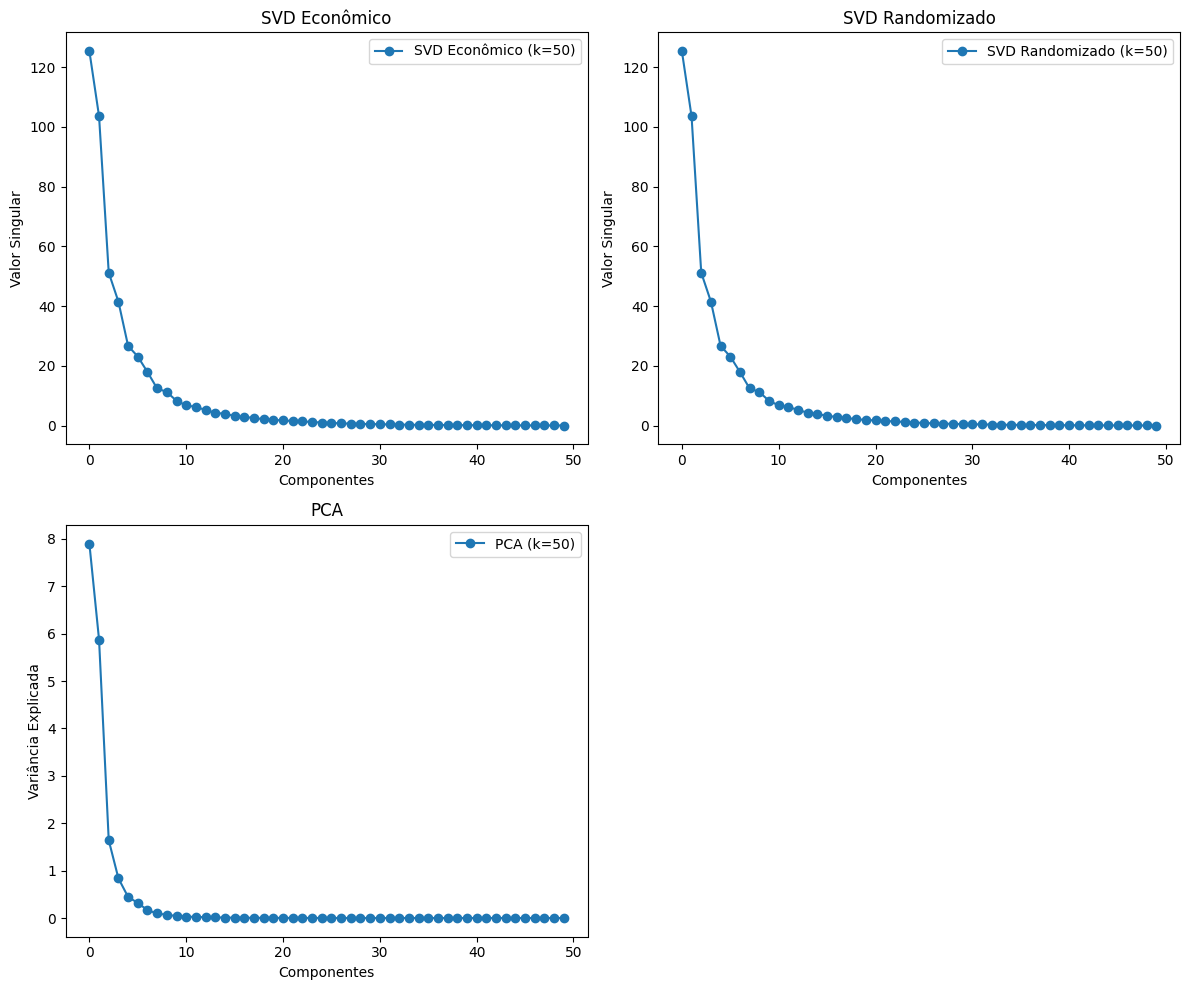

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd

# Exemplo de carregamento de dados
arquivo_csv = r'C:/Users/Mimo/Mestrado/Boia/Szz.csv'
spotter = pd.read_csv(arquivo_csv, sep=',', header=None, on_bad_lines='skip')

# Frequências e Espectro Original
f = spotter.iloc[0, 11:137].values.astype(float)
E_original = spotter.iloc[1, 11:137].values.astype(float)
E_original = np.nan_to_num(E_original, nan=0.0)

# Matriz de espectros para os diferentes métodos
E_matriz = spotter.iloc[1:, 11:137].values.astype(float)
E_matriz = np.nan_to_num(E_matriz, nan=0.0)

# Definir a quantidade de componentes principais (k)
k = 50

# Função para aplicar o SVD econômico
def plot_svd_economico(ax, k):
    Uhat, Shat, Vhat = np.linalg.svd(E_matriz, full_matrices=False)
    Shat_trunc = Shat[:k]  # Truncar com k componentes principais
    ax.plot(Shat_trunc, 'o-', label=f'SVD Econômico (k={k})')
    ax.set_title("SVD Econômico")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Valor Singular")
    ax.legend()
    
# Função para aplicar o SVD randomizado
def plot_svd_randomizado(ax, k=15):
    Uhat, Shat, Vhat = randomized_svd(E_matriz, n_components=k)
    ax.plot(Shat, 'o-', label=f'SVD Randomizado (k={k})')
    ax.set_title("SVD Randomizado")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Valor Singular")
    ax.legend()

# Função para aplicar PCA
def plot_pca(ax, k=15):
    pca = PCA(n_components=k)
    pca.fit(E_matriz)
    ax.plot(pca.explained_variance_, 'o-', label=f'PCA (k={k})')
    ax.set_title("PCA")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Variância Explicada")
    ax.legend()

# Criar um layout 2x2 com subplots e usar apenas 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gerar os plots para cada método nos três subplots
plot_svd_economico(axs[0, 0], k=k)
plot_svd_randomizado(axs[0, 1], k=k)
plot_pca(axs[1, 0], k=k)

# Deixar o último subplot vazio (axs[1, 1])
axs[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()




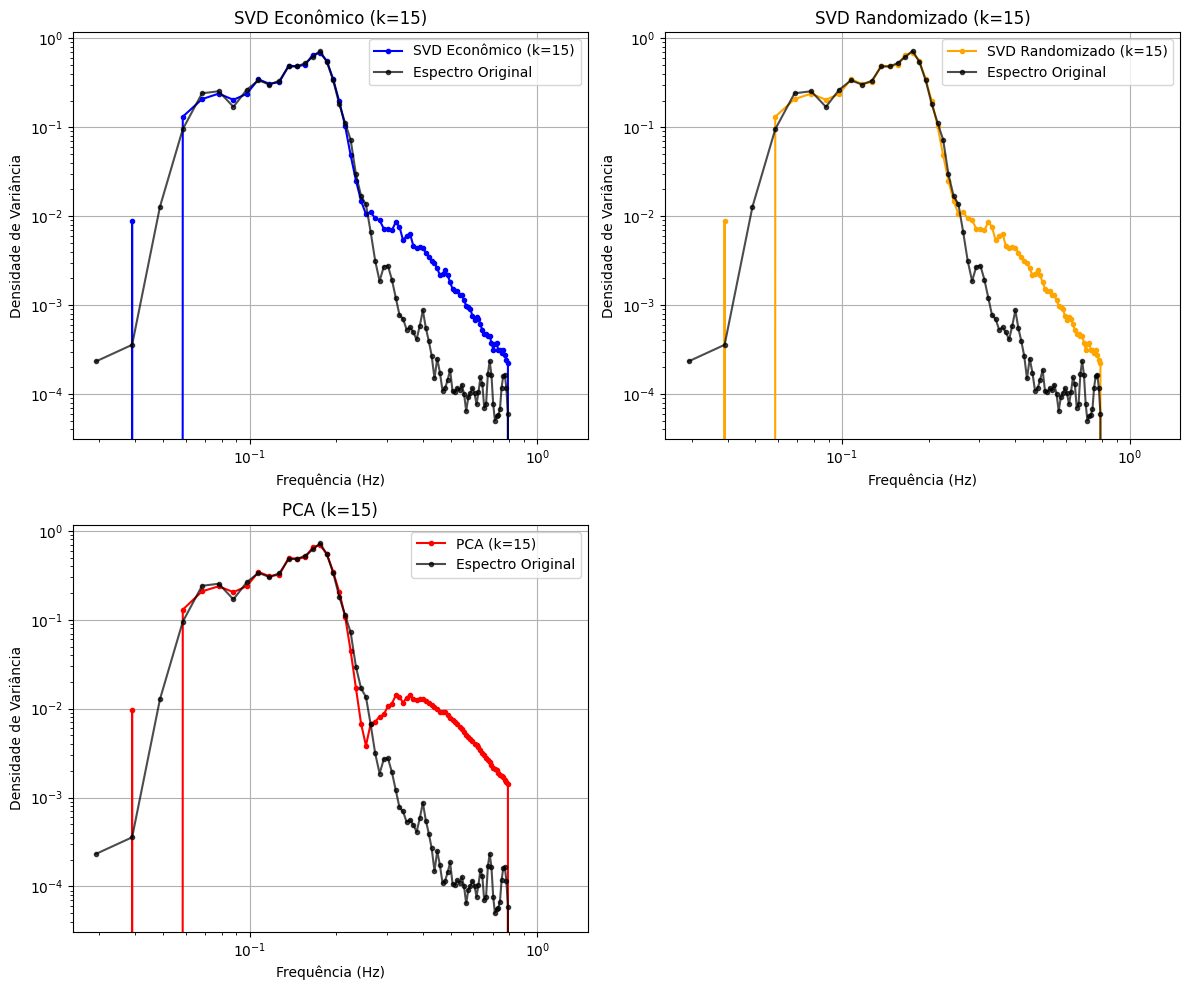

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd

# Carregar os dados do arquivo CSV
arquivo_csv = r'C:/Users/Mimo/Mestrado/Boia/Szz.csv'
spotter = pd.read_csv(arquivo_csv, sep=',', header=None, on_bad_lines='skip')

# Frequências e Espectro Original
f = spotter.iloc[0, 11:137].values.astype(float)
E_original = spotter.iloc[1, 11:137].values.astype(float)
E_original = np.nan_to_num(E_original, nan=0.0)

# Matriz de espectros (todos os dados de espectro para diferentes técnicas)
E_matriz = spotter.iloc[1:, 11:137].values.astype(float)
E_matriz = np.nan_to_num(E_matriz, nan=0.0)

# Função para reconstruir o espectro usando SVD Econômico com escolha de k
def plot_svd_economico_espectro(ax, k):
    Uhat, Shat, Vhat = np.linalg.svd(E_matriz, full_matrices=False)
    U_trunc = Uhat[:, :k]
    S_trunc = np.diag(Shat[:k])
    V_trunc = Vhat[:k, :]
    E_reconstruido = U_trunc @ S_trunc @ V_trunc
    ax.loglog(f, E_reconstruido[0, :], marker='.', label=f'SVD Econômico (k={k})', color='blue')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"SVD Econômico (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Função para reconstruir o espectro usando SVD Randomizado
def plot_svd_randomizado_espectro(ax, k=50):
    Uhat, Shat, Vhat = randomized_svd(E_matriz, n_components=k)
    E_reconstruido_random = Uhat @ np.diag(Shat) @ Vhat
    ax.loglog(f, E_reconstruido_random[0, :], marker='.', label=f'SVD Randomizado (k={k})', color='orange')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"SVD Randomizado (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Função para reconstruir o espectro usando PCA
def plot_pca_espectro(ax, k=50):
    pca = PCA(n_components=k)
    E_pca = pca.fit_transform(E_matriz)
    E_reconstruido_pca = pca.inverse_transform(E_pca)
    ax.loglog(f, E_reconstruido_pca[0, :], marker='.', label=f'PCA (k={k})', color='red')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"PCA (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Escolha de k
k_value = 15  # Alterar este valor conforme necessário para todas as técnicas

# Criar layout 2x2 para os espectros reconstruídos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gerar os plots para cada técnica, incluindo o espectro original
plot_svd_economico_espectro(axs[0, 0], k=k_value)
plot_svd_randomizado_espectro(axs[0, 1], k=k_value)
plot_pca_espectro(axs[1, 0], k=k_value)

# Deixar o último subplot vazio (axs[1, 1])
axs[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()


In [29]:
# Determinar o número total de características
n = E_matriz.shape[1]  # número de colunas na matriz de espectros

# Número de componentes retidos
k = 50  # conforme definido entre os valores 50, 20, 15

# Calcular a porcentagem de redução
percent_reduction = (1 - (k / n)) * 100

# Exibir o resultado
print(f"Número total de características originais: {n}")
print(f"Número de componentes retidos: {k}")
print(f"Porcentagem de Redução de Dimensionalidade: {percent_reduction:.2f}%")


Número total de características originais: 79
Número de componentes retidos: 50
Porcentagem de Redução de Dimensionalidade: 36.71%


Quantidade de NaNs na matriz após preenchimento: 0


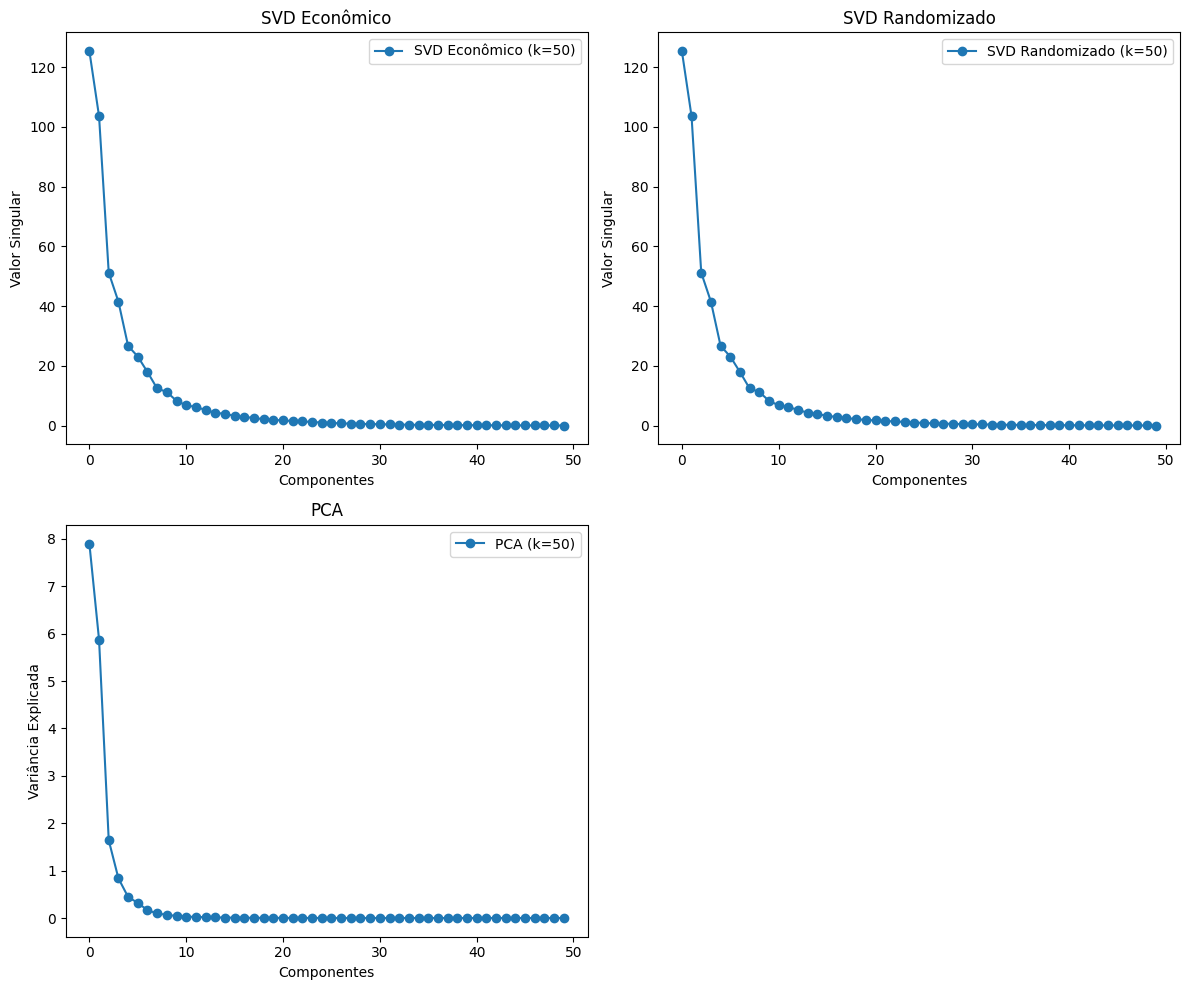

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd

# Exemplo de carregamento de dados
arquivo_csv = r'C:/Users/Mimo/Mestrado/Boia/Szz.csv'
spotter = pd.read_csv(arquivo_csv, sep=',', header=None, on_bad_lines='skip')

# Frequências e Espectro Original
f = spotter.iloc[0, 11:90].values.astype(float)

# Filtrar as linhas de dados úteis (a partir da segunda linha) e as colunas de interesse (12 a 90)
E_matriz = spotter.iloc[1:, 11:90].values.astype(float)

# Preencher NaNs com a média da coluna
E_matriz_df = pd.DataFrame(E_matriz)
E_matriz_filled = E_matriz_df.fillna(E_matriz_df.mean()).values

# Verificar e imprimir a quantidade de NaNs restantes
num_nans = np.isnan(E_matriz_filled).sum()
print(f'Quantidade de NaNs na matriz após preenchimento: {num_nans}')

# Definir a quantidade de componentes principais (k)
k = 50

# Função para aplicar o SVD econômico
def plot_svd_economico(ax, k):
    Uhat, Shat, Vhat = np.linalg.svd(E_matriz_filled, full_matrices=False)
    Shat_trunc = Shat[:k]  # Truncar com k componentes principais
    ax.plot(Shat_trunc, 'o-', label=f'SVD Econômico (k={k})')
    ax.set_title("SVD Econômico")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Valor Singular")
    ax.legend()
    
# Função para aplicar o SVD randomizado
def plot_svd_randomizado(ax, k=15):
    Uhat, Shat, Vhat = randomized_svd(E_matriz_filled, n_components=k)
    ax.plot(Shat, 'o-', label=f'SVD Randomizado (k={k})')
    ax.set_title("SVD Randomizado")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Valor Singular")
    ax.legend()

# Função para aplicar PCA
def plot_pca(ax, k=15):
    pca = PCA(n_components=k)
    pca.fit(E_matriz_filled)
    ax.plot(pca.explained_variance_, 'o-', label=f'PCA (k={k})')
    ax.set_title("PCA")
    ax.set_xlabel("Componentes")
    ax.set_ylabel("Variância Explicada")
    ax.legend()

# Criar um layout 2x2 com subplots e usar apenas 3 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gerar os plots para cada método nos três subplots
plot_svd_economico(axs[0, 0], k=k)
plot_svd_randomizado(axs[0, 1], k=k)
plot_pca(axs[1, 0], k=k)

# Deixar o último subplot vazio (axs[1, 1])
axs[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()


Quantidade de NaNs na matriz após preenchimento: 0
Dimensões: f = 79, E_matriz_filled = 79


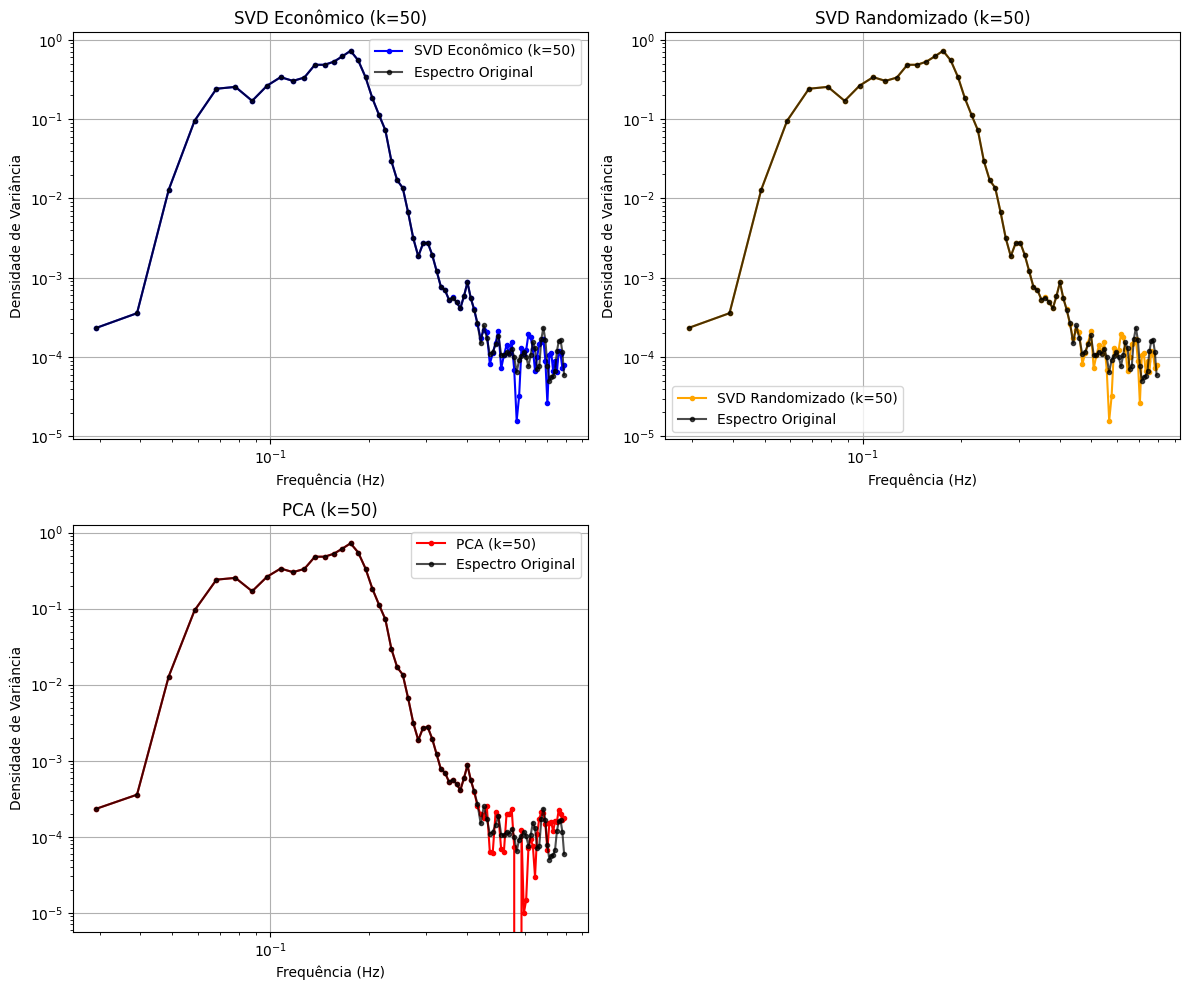

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.utils.extmath import randomized_svd

# Carregar os dados do arquivo CSV
arquivo_csv = r'C:/Users/Mimo/Mestrado/Boia/Szz.csv'
spotter = pd.read_csv(arquivo_csv, sep=',', header=None, on_bad_lines='skip')

# Frequências e Espectro Original
# Ajuste aqui: selecione as colunas corretas para frequências e espectros
f = spotter.iloc[0, 11:90].values.astype(float)  # Frequências agora devem ter 79 elementos
E_original = spotter.iloc[1, 11:90].values.astype(float)  # Agora estamos usando a mesma faixa

# Filtrar as linhas de dados úteis (a partir da segunda linha) e as colunas de interesse (12 a 90)
E_matriz = spotter.iloc[1:, 11:90].values.astype(float)  # 79 colunas

# Preencher NaNs com a média da coluna
E_matriz_df = pd.DataFrame(E_matriz)
E_matriz_filled = E_matriz_df.fillna(E_matriz_df.mean()).values

# Verificar e imprimir a quantidade de NaNs restantes
num_nans = np.isnan(E_matriz_filled).sum()
print(f'Quantidade de NaNs na matriz após preenchimento: {num_nans}')

# Dimensões de f e E_matriz_filled devem ser consistentes agora
print(f'Dimensões: f = {f.shape[0]}, E_matriz_filled = {E_matriz_filled.shape[1]}')

# Função para reconstruir o espectro usando SVD Econômico com escolha de k
def plot_svd_economico_espectro(ax, k):
    Uhat, Shat, Vhat = np.linalg.svd(E_matriz_filled, full_matrices=False)
    U_trunc = Uhat[:, :k]
    S_trunc = np.diag(Shat[:k])
    V_trunc = Vhat[:k, :]
    E_reconstruido = U_trunc @ S_trunc @ V_trunc
    ax.loglog(f, E_reconstruido[0, :], marker='.', label=f'SVD Econômico (k={k})', color='blue')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"SVD Econômico (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Função para reconstruir o espectro usando SVD Randomizado
def plot_svd_randomizado_espectro(ax, k=50):
    Uhat, Shat, Vhat = randomized_svd(E_matriz_filled, n_components=k)
    E_reconstruido_random = Uhat @ np.diag(Shat) @ Vhat
    ax.loglog(f, E_reconstruido_random[0, :], marker='.', label=f'SVD Randomizado (k={k})', color='orange')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"SVD Randomizado (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Função para reconstruir o espectro usando PCA
def plot_pca_espectro(ax, k=50):
    pca = PCA(n_components=k)
    E_pca = pca.fit_transform(E_matriz_filled)
    E_reconstruido_pca = pca.inverse_transform(E_pca)
    ax.loglog(f, E_reconstruido_pca[0, :], marker='.', label=f'PCA (k={k})', color='red')
    ax.loglog(f, E_original, marker='.', label='Espectro Original', color='black', alpha=0.7)
    ax.set_title(f"PCA (k={k})")
    ax.set_xlabel("Frequência (Hz)")
    ax.set_ylabel("Densidade de Variância")
    ax.grid(True)
    ax.legend()

# Escolha de k
k_value = 50  # Alterar este valor conforme necessário para todas as técnicas

# Criar layout 2x2 para os espectros reconstruídos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gerar os plots para cada técnica, incluindo o espectro original
plot_svd_economico_espectro(axs[0, 0], k=k_value)
plot_svd_randomizado_espectro(axs[0, 1], k=k_value)
plot_pca_espectro(axs[1, 0], k=k_value)

# Deixar o último subplot vazio (axs[1, 1])
axs[1, 1].axis('off')

# Ajustar o layout
plt.tight_layout()
plt.show()
